In [28]:
# Import libraries and dependencies
import os
import pandas as pd
import panel as pn
import alpaca_trade_api as tradeapi
import csv
from pathlib import Path
import hvplot.pandas
import numpy as np

#### READING IN THE DATA

In [13]:
# Read in data
# SPY Full Date Range
spy_full_date_range_df = pd.read_csv(
    Path("spy_01012011_to_12312020.csv"),
    infer_datetime_format=True,
    parse_dates=True,
    index_col="Date",
)

# SPY First Dip
spy_first_dip_df = pd.read_csv(
    Path("spy_10012007_to_03022009.csv"),
    infer_datetime_format=True,
    parse_dates=True,
    index_col="Date",
)

# SPY Second Dip
spy_second_dip_df = pd.read_csv(
    Path("spy_02022015_to_030012016.csv"),
    infer_datetime_format=True,
    parse_dates=True,
    index_col="Date",
)

# SPY Third Dip
spy_third_dip_df = pd.read_csv(
    Path("spy_01012018_to_12032018.csv"),
    infer_datetime_format=True,
    parse_dates=True,
    index_col="Date",
)

# VAW Full Date Range
vaw_full_date_range_df = pd.read_csv(
    Path("vaw_01012011_to_12312020.csv"),
    infer_datetime_format=True,
    parse_dates=True,
    index_col="Date",
)

# VAW First Dip
vaw_first_dip_df = pd.read_csv(
    Path("vaw_10012007_to_03022009.csv"),
    infer_datetime_format=True,
    parse_dates=True,
    index_col="Date",
)

# VAW Second Dip
vaw_second_dip_df = pd.read_csv(
    Path("vaw_02022015_to_03012016.csv"),
    infer_datetime_format=True,
    parse_dates=True,
    index_col="Date",
)

# VAW Third Dip
vaw_third_dip_df = pd.read_csv(
    Path("vaw_01012018_to_12032018.csv"),
    infer_datetime_format=True,
    parse_dates=True,
    index_col="Date",
)

# VCR Full Date Range
vcr_full_date_range_df = pd.read_csv(
    Path("vcr_01012011_to_12312020.csv"),
    infer_datetime_format=True,
    parse_dates=True,
    index_col="Date",
)

# VCR First Dip
vcr_first_dip_df = pd.read_csv(
    Path("vcr_10012007_to_03022009.csv"),
    infer_datetime_format=True,
    parse_dates=True,
    index_col="Date",
)

# VCR Second Dip
vcr_second_dip_df = pd.read_csv(
    Path("vcr_02022015_to_03012016.csv"),
    infer_datetime_format=True,
    parse_dates=True,
    index_col="Date",
)

# VCR Third Dip
vcr_third_dip_df = pd.read_csv(
    Path("vcr_01012018_to_12032018.csv"),
    infer_datetime_format=True,
    parse_dates=True,
    index_col="Date",
)

# VIS Full Date Range
vis_full_date_range_df = pd.read_csv(
    Path("vis_01012011_to_12312020.csv"),
    infer_datetime_format=True,
    parse_dates=True,
    index_col="Date",
)

# VIS First Dip
vis_first_dip_df = pd.read_csv(
    Path("vis_10012007_to_03022009.csv"),
    infer_datetime_format=True,
    parse_dates=True,
    index_col="Date",
)

# VIS Second Dip
vis_second_dip_df = pd.read_csv(
    Path("vis_02022015_to_03012016.csv"),
    infer_datetime_format=True,
    parse_dates=True,
    index_col="Date",
)

# VIS Third Dip
vis_third_dip_df = pd.read_csv(
    Path("vis_01012018_to_12032018.csv"),
    infer_datetime_format=True,
    parse_dates=True,
    index_col="Date",
)

spy_third_dip_df.shape


(752, 1)

## Full Date Range

In [14]:
# Full Date Range DF
# Create a new pivot table where the columns are the closing prices for each ticker
combined_full_date_range_df = pd.concat([spy_full_date_range_df, vaw_full_date_range_df, vcr_full_date_range_df, vis_full_date_range_df], axis="columns", join="inner")

# Sort datetime index in ascending order (past to present)
combined_full_date_range_df.sort_index(inplace=True)

# Set column names
combined_full_date_range_df.columns = ['SPY', 'VAW', 'VCR', 'VIS']

# Display a few rows
combined_full_date_range_df.head()

# Use the `pct_change` function to calculate daily returns
combined_full_date_range_daily_returns = combined_full_date_range_df.pct_change().dropna()
combined_full_date_range_daily_returns.head()

,SPY,VAW,VCR,VIS
Date,,,,
2011-01-04,-0.000551,-0.007327,-0.006700,-0.003977
2011-01-05,0.005198,0.001694,0.008391,0.006604
2011-01-06,-0.001959,-0.004107,-0.006200,-0.001984
2011-01-07,-0.001962,-0.002183,-0.001806,0.001223
2011-01-10,-0.001258,0.001580,0.000658,0.001527


In [15]:
combined_full_date_range_daily_returns.describe()

,SPY,VAW,VCR,VIS
count,2515.000000,2515.000000,2515.000000,2515.000000
mean,0.000487,0.000344,0.000669,0.000461
std,0.010873,0.013560,0.011840,0.012818
min,-0.109424,-0.110705,-0.130318,-0.114612
25%,-0.003454,-0.005928,-0.004337,-0.004898
50%,0.000606,0.000791,0.001254,0.000974
75%,0.005388,0.007081,0.006499,0.006308
max,0.090603,0.118297,0.092098,0.119055


### For the full 10-year period, the only sector in this grouping which outperforms the S&P500 is Consumer Discretionary, with an average daily return of 0.000669%.

## First Dip

In [16]:
# First Dip DF
# Create a new pivot table where the columns are the closing prices for each ticker
combined_first_dip_df = pd.concat([spy_first_dip_df, vaw_first_dip_df, vcr_first_dip_df, vis_first_dip_df], axis="columns", join="inner")


# Sort datetime index in ascending order (past to present)
combined_first_dip_df.sort_index(inplace=True)

# Set column names
combined_first_dip_df.columns = ['SPY', 'VAW', 'VCR', 'VIS']

# Display a few rows
combined_first_dip_df.head()

# Use the `pct_change` function to calculate daily returns
combined_first_dip_daily_returns = combined_first_dip_df.pct_change()
combined_first_dip_daily_returns.head()


,SPY,VAW,VCR,VIS
Date,,,,
2006-01-03,NaN,NaN,NaN,NaN
2006-01-04,0.004736,0.005899,0.000756,0.010605
2006-01-05,0.000628,0.001792,0.000566,-0.002580
2006-01-06,0.008322,0.010732,0.008303,0.008106
2006-01-09,0.002569,0.002091,0.009171,0.005133


In [17]:
combined_first_dip_described = combined_first_dip_daily_returns.describe()
combined_first_dip_described

,SPY,VAW,VCR,VIS
count,1245.000000,1245.000000,1245.000000,1245.000000
mean,0.000118,0.000453,0.000258,0.000246
std,0.015692,0.020429,0.017240,0.017276
min,-0.098448,-0.123041,-0.093891,-0.093129
25%,-0.005373,-0.008750,-0.006967,-0.006663
50%,0.000593,0.001529,0.000630,0.001011
75%,0.006386,0.010900,0.007968,0.007933
max,0.145198,0.108867,0.110615,0.093930


In [18]:
combined_first_dip_described.columns

Index(['SPY', 'VAW', 'VCR', 'VIS'], dtype='object')

In [19]:
# STD and Mean for Grouing During First Dip
spy_std_first_dip = combined_first_dip_described.loc['std','SPY']
vaw_std_first_dip = combined_first_dip_described.loc['std','VAW']
vcr_std_first_dip = combined_first_dip_described.loc['std','VCR']
vis_std_first_dip = combined_first_dip_described.loc['std','VIS']
spy_mean_first_dip = combined_first_dip_described.loc['mean','SPY']
vaw_mean_first_dip = combined_first_dip_described.loc['mean','VAW']
vcr_mean_first_dip = combined_first_dip_described.loc['mean','VCR']
vis_mean_first_dip = combined_first_dip_described.loc['mean','VIS']

#df_shares = pd.DataFrame(shares_data, index=tickers)




##### This bar chart shows the standard deviation of daily returns during the first market dip in question. Standard deviation is regarded as an indicator of volatility. Here, we see the S&P500 had the lowest volatility in the grouping, and the Materials ETF (VAW) demonstrated the highest volatility.

In [20]:
combined_first_dip_mean = pd.DataFrame(columns=['SPY','VAW','VCR','VIS'])
#columns=[spy_std_first_dip,vaw_std_first_dip,vcr_std_first_dip,vis_std_first_dip]
combined_first_dip_mean['SPY']=[spy_mean_first_dip]
combined_first_dip_mean['VAW']=[vaw_mean_first_dip]
combined_first_dip_mean['VCR']=[vcr_mean_first_dip]
combined_first_dip_mean['VIS']=[vis_mean_first_dip]
combined_first_dip_mean.head()

,SPY,VAW,VCR,VIS
0,0.000118,0.000453,0.000258,0.000246


In [21]:
combined_first_dip_mean.hvplot.bar(
    title="First Dip - Mean Daily Returns of Sector Grouping - 10/01/2007 to 03/02/2009",
    xlabel="Market Sectors",
    ylabel="Mean Daily Returns - First Dip",
    yformatter='%.0f'
)

:Bars   [index,Variable]   (value)

##### Once again, the S&P500 came out ahead vs this grouoing of ETFs during the first dip, this time in terms of their daily returns. 

## First Dip - Evaluate Correlation of ETF Returns

In [22]:
# Use the `corr` function to calculate the correlation between stock returns
combined_first_dip_correlation = combined_first_dip_daily_returns.corr()
combined_first_dip_correlation

,SPY,VAW,VCR,VIS
SPY,1.000000,0.880906,0.911913,0.927504
VAW,0.880906,1.000000,0.827228,0.893969
VCR,0.911913,0.827228,1.000000,0.921402
VIS,0.927504,0.893969,0.921402,1.000000


In [23]:
import seaborn as sns


## First Dip - Correlation of Daily Returns of ETFs in Grouping 

<AxesSubplot:>

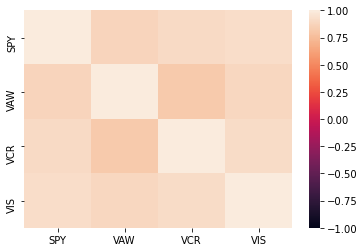

In [24]:
# Use the `heatmap` function from the Seaborn library to visualize the correlation table
sns.heatmap(combined_first_dip_correlation, vmin=-1, vmax=1)

##### It is a pretty straightforward conclusion that the ETFs in this grouping were all strongly correlated to the S&P500 during the first dip. 

## First Dip - Standard Deviation

In [25]:
# Create new dataframe with std row from descrition dataframe.
combined_first_dip_std = pd.DataFrame(columns=['SPY','VAW','VCR','VIS'])
combined_first_dip_std['SPY']=[spy_std_first_dip]
combined_first_dip_std['VAW']=[vaw_std_first_dip]
combined_first_dip_std['VCR']=[vcr_std_first_dip]
combined_first_dip_std['VIS']=[vis_std_first_dip]
combined_first_dip_std.head()

,SPY,VAW,VCR,VIS
0,0.015692,0.020429,0.01724,0.017276


In [26]:
combined_first_dip_std.hvplot.bar(
    title="First Dip - Standard Deviation of Sector Grouping - 10/01/2007 to 03/02/2009",
    xlabel="Market Sectors",
    ylabel="Standard Deviation - First Dip"
)

:Bars   [index,Variable]   (value)

In [29]:
# Use the `std` function and multiply by the square root of the number of trading days in a year to get annualized volatility 
combined_first_dip_volatility = combined_first_dip_daily_returns.std() * np.sqrt(252)
combined_first_dip_volatility.sort_values(inplace=True)
combined_first_dip_volatility

SPY    0.249108
VCR    0.273682
VIS    0.274254
VAW    0.324300
dtype: float64

In [ ]:
# Drop the five stocks with the highest volatility in daily returns - PERHAPS WE DO THIS ONCE ALL 11 SECTORS ARE COMBINED IN ONE DF? DROP THE WEAKEST 50%?
# daily_returns.drop(columns=['MU', 'WDC', 'JNJ', 'FANG', 'WRK'], inplace=True)
# daily_returns.head()

# Set weights for corresponding risk profile of stocks, use the `dot` function to multiply each weight by the corresponding stock daily return
# BK, LUV, NKE, SBUX, T
weights = [0.15, 0.05, 0.10, 0.2, 0.50]
portfolio_returns = daily_returns.dot(weights)
portfolio_returns.head()

# Use the `cumprod` function to calculate cumulative returns
cumulative_returns = (1 + portfolio_returns).cumprod()
cumulative_returns.head()

# Plot the returns of the portfolio in terms of money
initial_investment = 10000
cumulative_profit = initial_investment * cumulative_returns
cumulative_profit.plot()

##### All of these ETFs were losers during the 2nd dip. S&P500 lost the least. It was also the least volatile. 

## Second Dip

In [31]:
# Second Dip DF
# Create a new pivot table where the columns are the closing prices for each ticker
combined_second_dip_df = pd.concat([spy_second_dip_df, vaw_second_dip_df, vcr_second_dip_df, vis_second_dip_df], axis="columns", join="inner")

# Sort datetime index in ascending order (past to present)
combined_second_dip_df.sort_index(inplace=True)

# Set column names
combined_second_dip_df.columns = ['SPY', 'VAW', 'VCR', 'VIS']

# Display a few rows
combined_second_dip_df.head()

# Use the `pct_change` function to calculate daily returns
combined_second_dip_daily_returns = combined_second_dip_df.pct_change().dropna()
combined_second_dip_daily_returns.head()

,SPY,VAW,VCR,VIS
Date,,,,
2014-01-03,-0.000164,-0.001171,-0.001488,0.003645
2014-01-06,-0.002898,-0.006156,-0.006333,-0.006659
2014-01-07,0.006142,-0.000393,0.005811,0.005383
2014-01-08,0.000218,0.003934,-0.001118,0.000000
2014-01-09,0.000654,-0.002155,-0.002892,0.004243


In [32]:
combined_second_dip_daily_returns.describe()

,SPY,VAW,VCR,VIS
count,1005.000000,1005.000000,1005.000000,1005.000000
mean,0.000409,0.000338,0.000412,0.000405
std,0.007634,0.009897,0.008402,0.008708
min,-0.040884,-0.045883,-0.040234,-0.042212
25%,-0.002783,-0.004925,-0.003833,-0.003984
50%,0.000492,0.000779,0.000889,0.000648
75%,0.004424,0.006040,0.005363,0.005362
max,0.038394,0.037085,0.034792,0.030230


##### Consumer Discretionary actually made a profit during the Second Dip, with a daily average gain of 0.000135%.

## Third Dip

In [ ]:
# Third Dip DF
# Create a new pivot table where the columns are the closing prices for each ticker
combined_third_dip_df = pd.concat([spy_third_dip_df, vaw_third_dip_df, vcr_third_dip_df, vis_third_dip_df], axis="columns", join="inner")


# Sort datetime index in ascending order (past to present)
combined_third_dip_df.sort_index(inplace=True)

# Set column names
combined_third_dip_df.columns = ['SPY', 'VAW', 'VCR', 'VIS']

# Display a few rows
combined_third_dip_df.head()

# Use the `pct_change` function to calculate daily returns
combined_third_dip_daily_returns = combined_third_dip_df.pct_change().dropna()
combined_third_dip_daily_returns.head(-1)

In [ ]:
combined_third_dip_daily_returns.describe()

##### In the Third Dip, Consumer Discretionary once again came out ahead of this grouping. This time, S&P500 also maintained a positive daily average. The other two ETFs were losers. 

In [35]:
import hvplot.pandas
import plotly.express as px

<AxesSubplot:xlabel='Date'>

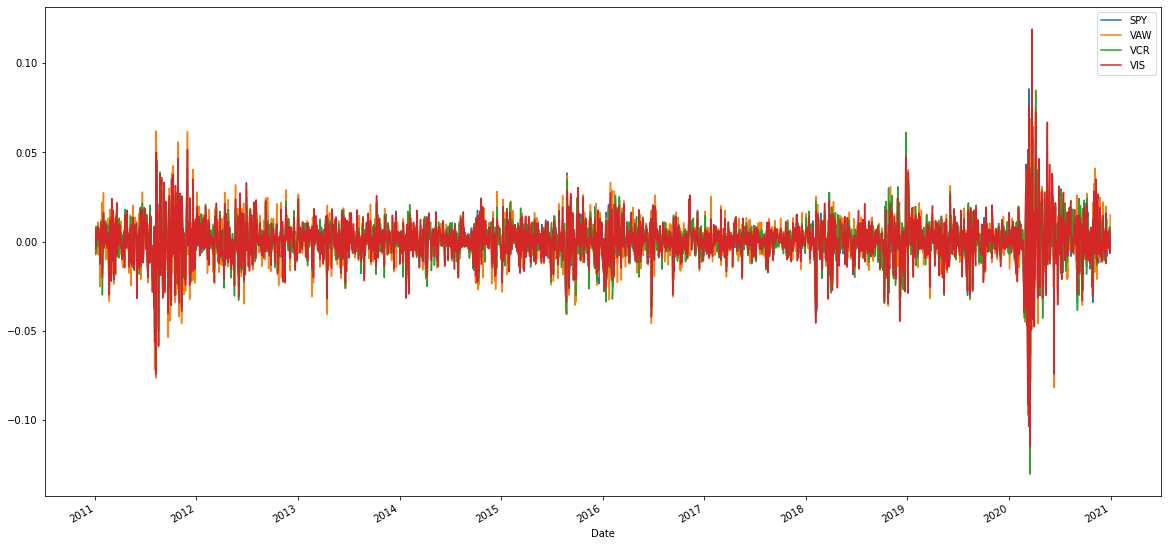

In [36]:
combined_full_date_range_daily_returns.plot(figsize=(20,10))

<AxesSubplot:xlabel='Date'>

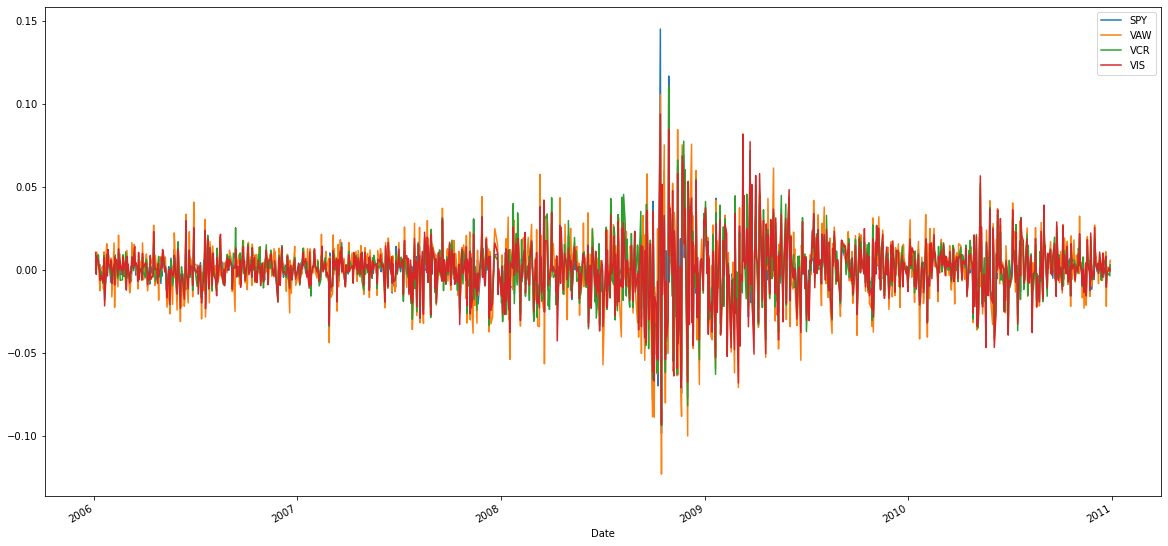

In [37]:
combined_first_dip_daily_returns.plot(figsize=(20,10))

<AxesSubplot:xlabel='Date'>

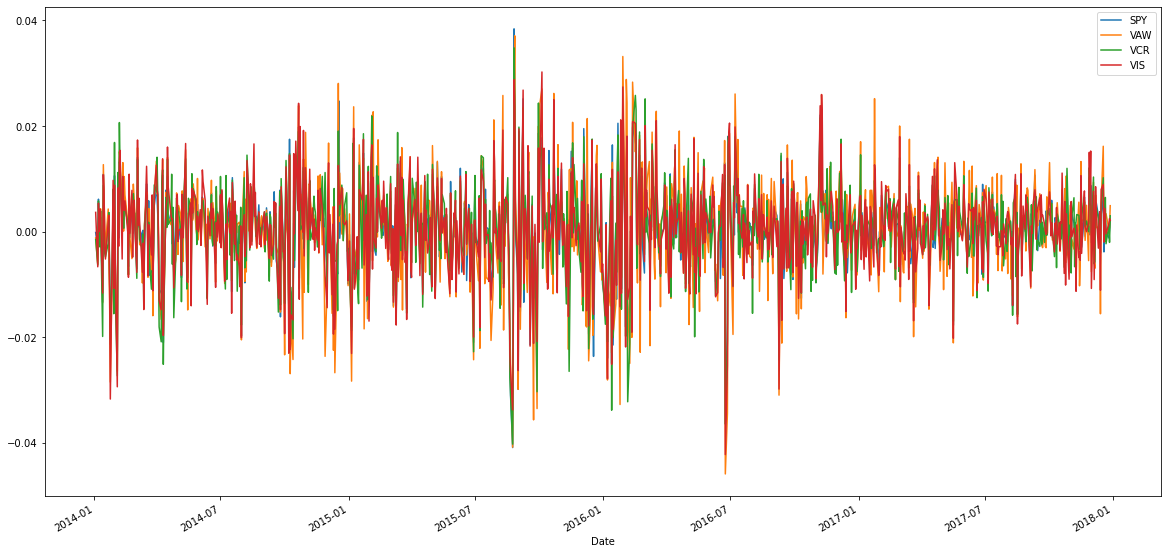

In [38]:
combined_second_dip_daily_returns.plot(figsize=(20,10))

In [39]:
combined_third_dip_daily_returns.plot(figsize=(20,10))

NameError: name 'combined_third_dip_daily_returns' is not defined

In [40]:
combined_full_date_range_daily_returns.hvplot()

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

### FULL TIMEFRAME - SPY vs VAW

In [41]:
#list(combined_full_date_range_daily_returns.columns)

spy_v_vaw_full_df = pd.concat([spy_full_date_range_df, vaw_full_date_range_df], axis="columns", join="inner")

# Sort datetime index in ascending order (past to present)
spy_v_vaw_full_df.sort_index(inplace=True)

# Set column names
spy_v_vaw_full_df.columns = ['SPY', 'VAW']

# Display a few rows
#spy_v_vaw_full_df.head()

# Use the `pct_change` function to calculate daily returns
spy_v_vaw_full_daily_returns = spy_v_vaw_full_df.pct_change().dropna()
spy_v_vaw_full_daily_returns.head()


spy_v_vaw_full_daily_returns.head()

,SPY,VAW
Date,,
2011-01-04,-0.000551,-0.007327
2011-01-05,0.005198,0.001694
2011-01-06,-0.001959,-0.004107
2011-01-07,-0.001962,-0.002183
2011-01-10,-0.001258,0.001580


In [42]:
spy_v_vaw_full_daily_returns.hvplot()

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

<AxesSubplot:xlabel='Date'>

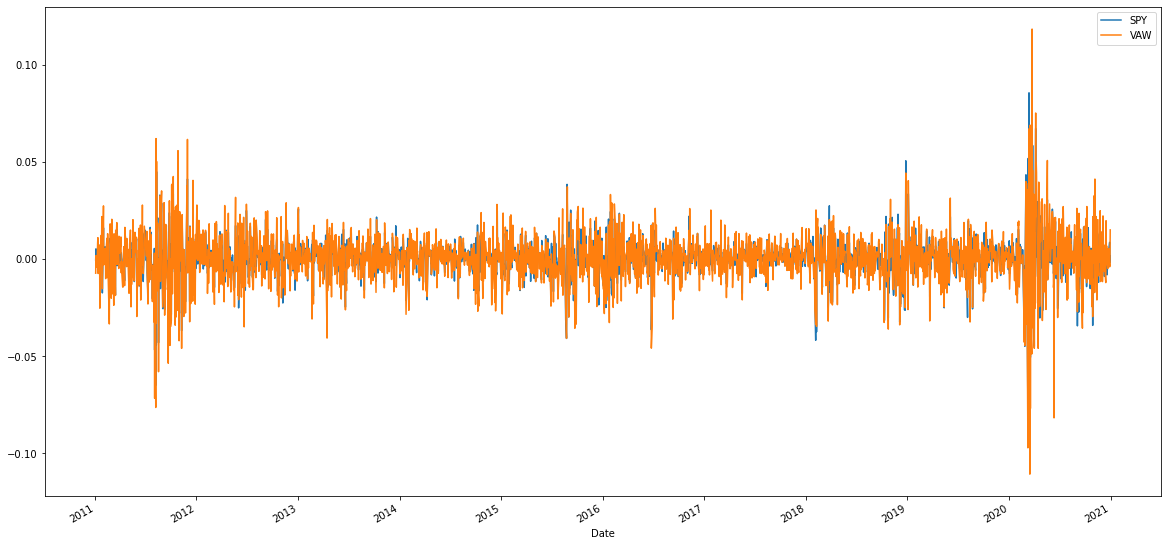

In [43]:
spy_v_vaw_full_daily_returns.plot(figsize=(20,10))

In [44]:
spy_v_vaw_full_chart = spy_v_vaw_full_daily_returns.hvplot.scatter(
    'Date',
    ['SPY', 'VAW'],
    title='SPY v VAW - Daily Returns - Full Range',
    xlabel='X',
    ylabel='Y',
    groupby='Date',
    height=500, 
    width=800, 
    rot=90,
)
spy_v_vaw_full_chart

:DynamicMap   [Date]
   :NdOverlay   [Variable]
      :Scatter   [Date]   (value)

In [45]:
#list(combined_full_date_range_daily_returns.columns)

spy_v_vaw_first_dip_df = pd.concat([spy_first_dip_df, vaw_first_dip_df], axis="columns", join="inner")

# Sort datetime index in ascending order (past to present)
spy_v_vaw_first_dip_df.sort_index(inplace=True)

# Set column names
spy_v_vaw_first_dip_df.columns = ['SPY', 'VAW']

# Display a few rows
#spy_v_vaw_first_dip_df.head()

# Use the `pct_change` function to calculate daily returns
spy_v_vaw_first_dip_daily_returns = spy_v_vaw_first_dip_df.pct_change().dropna()
spy_v_vaw_first_dip_daily_returns.head()


#spy_v_vaw_first_dip_daily_returns.head()

,SPY,VAW
Date,,
2006-01-04,0.004736,0.005899
2006-01-05,0.000628,0.001792
2006-01-06,0.008322,0.010732
2006-01-09,0.002569,0.002091
2006-01-10,0.001010,-0.002087


In [46]:
spy_v_vaw_first_dip_daily_returns.hvplot()

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [47]:
spy_vaw_first_dip_std = spy_v_vaw_first_dip_daily_returns.std()
spy_vaw_first_dip_std.head()

SPY    0.015692
VAW    0.020429
dtype: float64

In [48]:
spy_vaw_first_dip_std.hvplot.bar(
    title='Oct 2007 to Mar 2009 - Std Dev - SPY vs. VAW')

:Bars   [index]   (0)

In [49]:
spy_vaw_first_dip_correlation = spy_v_vaw_first_dip_daily_returns.corr()
spy_vaw_first_dip_correlation

,SPY,VAW
SPY,1.000000,0.880906
VAW,0.880906,1.000000


In [50]:
spy_v_vaw_first_dip_daily_returns.describe()

,SPY,VAW
count,1245.000000,1245.000000
mean,0.000118,0.000453
std,0.015692,0.020429
min,-0.098448,-0.123041
25%,-0.005373,-0.008750
50%,0.000593,0.001529
75%,0.006386,0.010900
max,0.145198,0.108867


##### The first dip, from Oct 2007 to Mar 2009, shows both SPY and VAW as losing on a daily basis, with VAW losing slightly more on average. VAW's std is slightly higher, indicating greater volatility. VAW is closely-correlated with SPY, at 0.879139 correlation.

In [51]:
# Calculate sharpe ratio
import numpy as np
spy_v_vaw_first_dip_sharpe_ratios = (spy_v_vaw_first_dip_daily_returns.mean() * 252) / (spy_vaw_first_dip_std * np.sqrt(252))
spy_v_vaw_first_dip_sharpe_ratios.head()

SPY    0.119088
VAW    0.351767
dtype: float64

In [52]:
spy_v_vaw_first_dip_sharpe_ratios.hvplot.bar(
    title='Oct 2007 to Mar 2009 - Sharpe Ratios - SPY vs. VAW')

:Bars   [index]   (0)

##### Analysis of above bar chart goes here

In [ ]:
# Use the `std` function and multiply by the square root of the number of trading days in a year to get annualized volatility
volatility = daily_returns.std() * np.sqrt(252)
volatility.sort_values(inplace=True)
volatility

# Drop the five stocks with the highest volatility in daily returns
daily_returns.drop(columns=['MU', 'WDC', 'JNJ', 'FANG', 'WRK'], inplace=True)
daily_returns.head()

# Set weights for corresponding risk profile of stocks, use the `dot` function to multiply each weight by the corresponding stock daily return
# BK, LUV, NKE, SBUX, T
weights = [0.15, 0.05, 0.10, 0.2, 0.50]
portfolio_returns = daily_returns.dot(weights)
portfolio_returns.head()

# Use the `cumprod` function to calculate cumulative returns
cumulative_returns = (1 + portfolio_returns).cumprod()
cumulative_returns.head()

# Plot the returns of the portfolio in terms of money
initial_investment = 10000
cumulative_profit = initial_investment * cumulative_returns
cumulative_profit.plot()
